In [ ]:
from keras.preprocessing.image import load_img, img_to_array
import os
import matplotlib.pyplot as plt

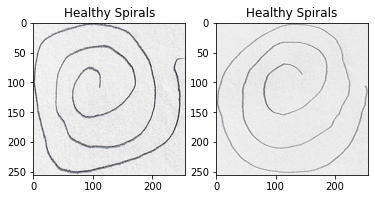

In [ ]:
#healthy spiral

plt.figure(figsize= (6,7))
for i in range(1, 3, 1):
    plt.subplot(1,2,i)
    cwd = os.getcwd()
    img = load_img(cwd + "/archive/spiral/training/healthy/" + os.listdir(cwd + "/archive/spiral/training/healthy")[i])
    plt.imshow(img)   
    plt.title('Healthy Spirals')
plt.show() 

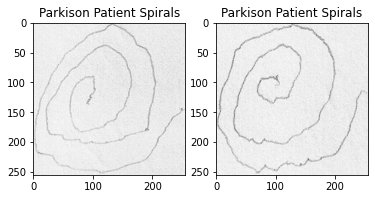

In [ ]:
#parkinson spiral

plt.figure(figsize= (6,7))
for i in range(1, 3, 1):
    plt.subplot(1,2,i)
    cwd = os.getcwd()
    img = load_img(cwd + "/archive/spiral/training/parkinson/" + os.listdir(cwd + "/archive/spiral/training/parkinson")[i])
    plt.imshow(img)   
    plt.title('Parkison Patient Spirals')
plt.show()  

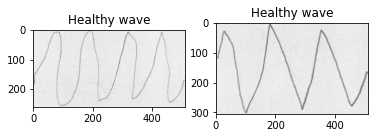

In [ ]:
#healthy wave

plt.figure(figsize= (6,6))
for i in range(1, 3, 1):
    plt.subplot(1,2,i)
    cwd = os.getcwd()
    img = load_img(cwd + "/archive/wave/training/healthy/" + os.listdir(cwd + "/archive/wave/training/healthy")[i])
    plt.imshow(img)  
    plt.title('Healthy wave')
plt.show() 

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
classifier=Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(128, 128, 3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(32,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(activation='relu',units=128))
classifier.add(Dense(activation='sigmoid',units=1))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                  shear_range = 0.2, 
                                  zoom_range = 0.2, 
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
spiral_train_generator = train_datagen.flow_from_directory(cwd + "/archive/spiral/training/",
                                                   target_size = (128,128),
                                                   batch_size = 28,
                                                   class_mode = 'binary')

spiral_test_generator = test_datagen.flow_from_directory(cwd + "/archive/spiral/testing/",
                                                   target_size = (128,128),
                                                   batch_size = 28,
                                                   class_mode = 'binary')

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [ ]:
wave_train_generator = train_datagen.flow_from_directory(cwd + "/archive/wave/training/",
                                                   target_size = (128,128),
                                                   batch_size = 28,
                                                   class_mode = 'binary')

wave_test_generator = test_datagen.flow_from_directory(cwd + "/archive/wave/testing/",
                                                   target_size = (128,128),
                                                   batch_size = 28,
                                                   class_mode = 'binary')

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [ ]:
from keras.optimizers import Adam

from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=5,verbose=1,restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,min_delta=0.0001)

callbacks_list = [early_stopping,reduce_learningrate]

epochs = 48

classifier.compile(loss='binary_crossentropy',optimizer = Adam(lr=0.001),metrics=['accuracy'])



In [ ]:
history = classifier.fit_generator(
        spiral_train_generator,
        steps_per_epoch=spiral_train_generator.n//spiral_train_generator.batch_size,
        epochs=28,
        validation_data=spiral_test_generator,
        validation_steps=spiral_test_generator.n//spiral_test_generator.batch_size,
        callbacks=callbacks_list)


Epoch 1/28
2/2 [==============================] - 1s 500ms/step - loss: 0.6933 - accuracy: 0.4464 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/28
2/2 [==============================] - 1s 347ms/step - loss: 0.6933 - accuracy: 0.3864 - val_loss: 0.6932 - val_accuracy: 0.3214 - lr: 0.0010
Epoch 3/28
2/2 [==============================] - 1s 475ms/step - loss: 0.6935 - accuracy: 0.5227 - val_loss: 0.6939 - val_accuracy: 0.4643 - lr: 0.0010
Epoch 4/28
2/2 [==============================] - ETA: 0s - loss: 0.6930 - accuracy: 0.5000
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
2/2 [==============================] - 1s 376ms/step - loss: 0.6930 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4643 - lr: 0.0010
Epoch 5/28
2/2 [==============================] - 1s 418ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4643 - lr: 2.0000e-04
Epoch 6/28
2/2 [==============================] - 1s 482ms/step - los

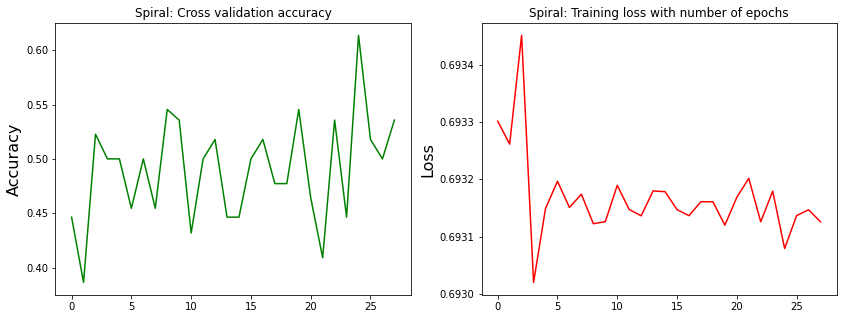

In [ ]:

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy', color = 'green')
plt.title('Spiral: Cross validation accuracy')



plt.subplot(1,2,2)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss', color = 'red')
plt.title('Spiral: Training loss with number of epochs')
plt.show()


In [ ]:
history = classifier.fit_generator(
        spiral_train_generator,
        steps_per_epoch=wave_train_generator.n//wave_train_generator.batch_size,
        epochs=28,
        validation_data=wave_test_generator,
        validation_steps=wave_test_generator.n//wave_test_generator.batch_size,
        callbacks=callbacks_list)

Epoch 1/28
2/2 [==============================] - 1s 662ms/step - loss: 0.6932 - accuracy: 0.4643 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 5.1200e-10
Epoch 2/28
2/2 [==============================] - 1s 541ms/step - loss: 0.6932 - accuracy: 0.4286 - val_loss: 0.6932 - val_accuracy: 0.4643 - lr: 5.1200e-10
Epoch 3/28
2/2 [==============================] - 1s 648ms/step - loss: 0.6932 - accuracy: 0.4643 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 5.1200e-10
Epoch 4/28
2/2 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5455
Epoch 00004: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
2/2 [==============================] - 1s 457ms/step - loss: 0.6931 - accuracy: 0.5455 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 5.1200e-10
Epoch 5/28
2/2 [==============================] - 1s 461ms/step - loss: 0.6932 - accuracy: 0.4318 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 1.0240e-10
Epoch 6/28
2/2 [==============================] - 1s 

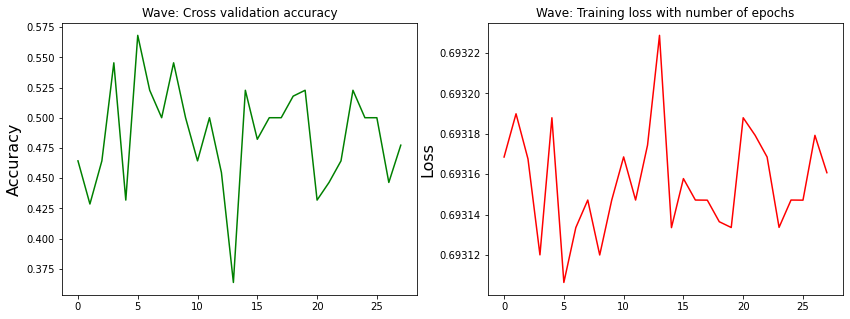

In [ ]:

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy', color = 'green')
plt.title('Wave: Cross validation accuracy')



plt.subplot(1,2,2)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss', color = 'red')
plt.title('Wave: Training loss with number of epochs')
plt.show()


In [ ]:
classifier.predcit()